# Wie funktioniert Bildkompression?

In [1]:
from ipywidgets import IntSlider, Textarea, interact
import os
from visualize import plot_bins

depth_widget = IntSlider(value=1, min=1, max=5)
pred_widget  = IntSlider(value=4, min=0, max=4)
qs_widget    = IntSlider(value=16, min=1, max=128)

def update(predmode, quantsize, depth):
    os.system("./comp_demo astronaut.bin 512 512 " + str(predmode) + " " + str(quantsize) + " " + str(depth))

    plot_bins(512, 512, depth)

    with open("bitstream.txt") as f:
        txtarea = Textarea(value=f.read(), description='Bitstream:', disabled=False)
        display(txtarea)
        f.close()

interact(update, predmode=pred_widget, quantsize=qs_widget, depth=depth_widget)

interactive(children=(IntSlider(value=4, description='predmode', max=4), IntSlider(value=16, description='quan…

<function __main__.update(predmode, quantsize, depth)>

## Prädiktion

![title][def]

[def]: demo_predmode.png

## Transfomation

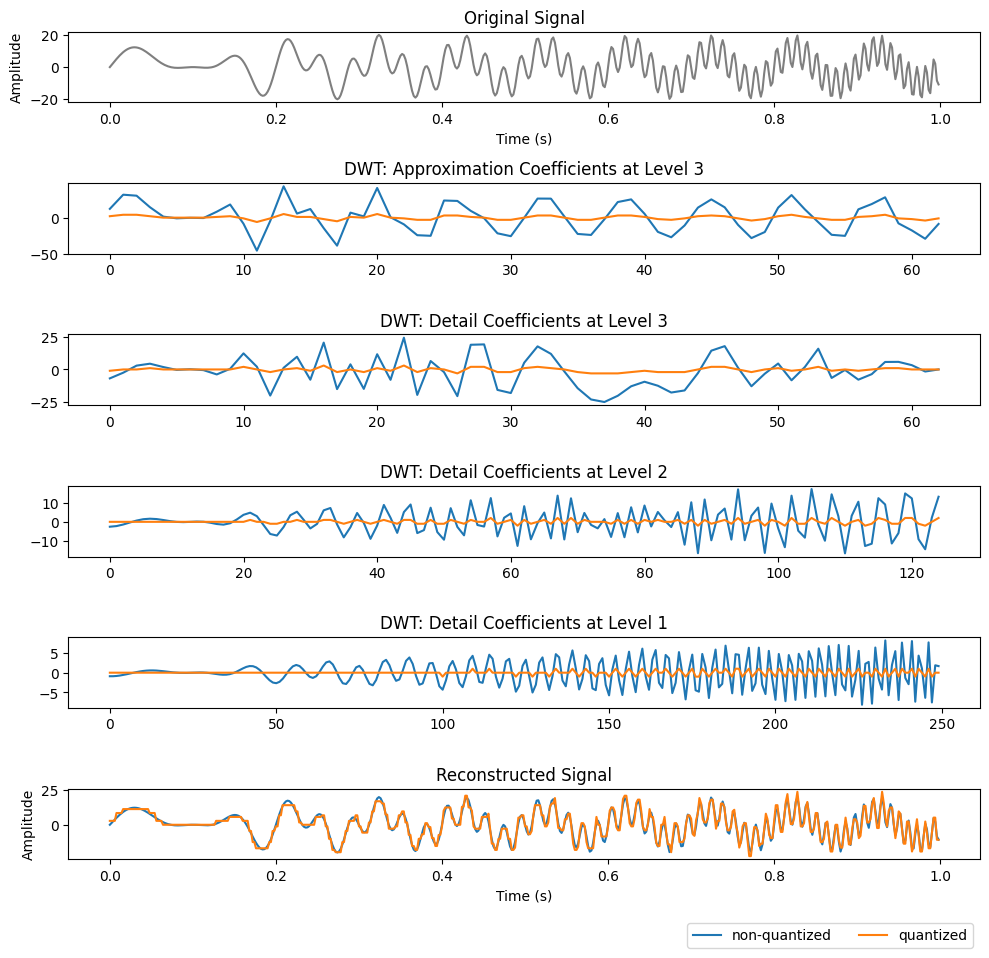

In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

#generate a simple signal (a combination of two sine waves)
t = np.linspace(0, 1, 500, endpoint=False)  # Time vector
signal = 10 * (np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t * t))  # Signal

#perform 3-Level DWT decomposition using Haar wavelet
cA3, cD3, cD2, cD1 = pywt.wavedec(signal, 'haar', level=3)

#quantization with stepsize qs
qs = 8
qcA3 = np.round(cA3 / qs)
qcD3 = np.round(cD3 / qs)
qcD2 = np.round(cD2 / qs)
qcD1 = np.round(cD1 / qs)

#perform DWT reconstruction for quantized and non-quantized coeffs
reco_orig = pywt.waverec([cA3, cD3, cD2, cD1], wavelet='haar')
reco_quant = pywt.waverec([qs * qcA3, qs * qcD3, qs * qcD2, qs * qcD1], wavelet='haar')

#plot the original signal and the decomposition results
fig = plt.figure(figsize=(10, 10))
c0 = "#7f7f7f"
c1 = "#1f77b4"
c2 = "#ff7f0e"

#plot the original signal
plt.subplot(6, 1, 1)
plt.plot(t, signal, color=c0)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

#plot the approximation coefficients at level 3
plt.subplot(6, 1, 2)
plt.plot(cA3, color=c1)
plt.plot(qcA3, color=c2)
plt.title("DWT: Approximation Coefficients at Level 3")

#plot the detail coefficients at level 3
plt.subplot(6, 1, 3)
plt.plot(cD3, color=c1)
plt.plot(qcD3, color=c2)
plt.title("DWT: Detail Coefficients at Level 3")

#plot the detail coefficients at level 2
plt.subplot(6, 1, 4)
plt.plot(cD2, color=c1)
plt.plot(qcD2, color=c2)
plt.title("DWT: Detail Coefficients at Level 2")

#plot the detail coefficients at level 1
plt.subplot(6, 1, 5)
plt.plot(cD1, color=c1)
plt.plot(qcD1, color=c2)
plt.title("DWT: Detail Coefficients at Level 1")

#plot the reconstructed signal
plt.subplot(6, 1, 6)
plt.plot(t, reco_orig, color=c1)
plt.plot(t, reco_quant, color=c2)
plt.title("Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["non-quantized", "quantized"], bbox_to_anchor=(1, -0.8), ncol=2)

plt.tight_layout()
plt.show()

## Rate-Distortion-Kosten

V0 : [2.218937 9.051395]
  Lambda: 32.25367327570893
  Min. Costs: 80.62026401738174
V1 : [ 1.594086 29.205135]
  Lambda: 58.22423078303954
  Min. Costs: 122.01956615201236
V2 : [ 1.383347 57.70298 ]
  Lambda: 200.62573712571813
  Min. Costs: 335.23799157565077
V3 : [ 1.27935  92.349277]
  Lambda: 478.7317582239111
  Min. Costs: 704.8147518837607
V4 : [  1.217094 137.293571]
  Lambda: 928.4858366366715
  Min. Costs: 1267.3481118554728
V5 : [  1.175667 188.617474]
  Lambda: 1638.7421063637028
  Min. Costs: 2115.2324899622954
V6 : [  1.145359 254.848736]
  Lambda: 2612.9329152885794
  Min. Costs: 3247.5949669220117
V7 : [  1.12336  325.292156]
  Lambda: 3202.1191872357676
  Min. Costs: 3922.4247661731715
Lambda prediction from quantization stepsize:
       2
1.187 x - 26.31 x + 154.9
Predicted Lambda values:
[20.300699721054087, 37.609964146440205, 206.7951293442167, 527.8561953143836, 1000.793162056941, 1625.6060295718887, 2402.2947978592265, 3330.859466918955]


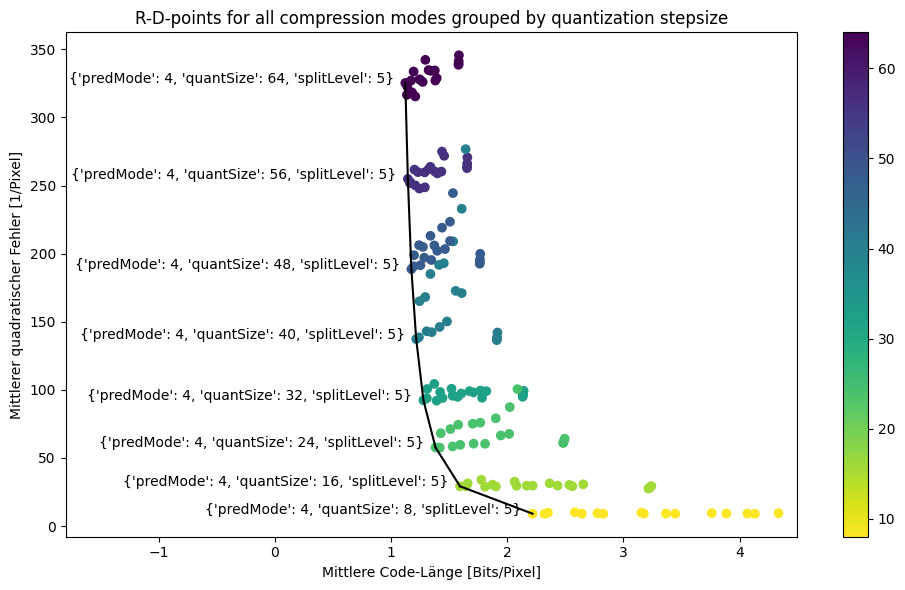

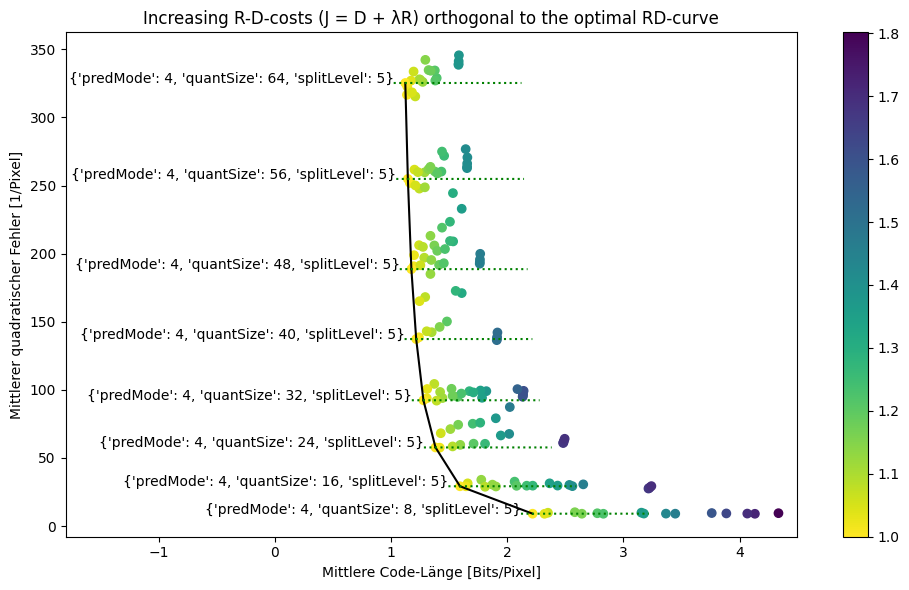

In [3]:
from eval_RD import plot_RD

plot_RD(None)